In [1]:
import sys
sys.path.append('../..')

import json
from pathlib import Path

import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm.auto import tqdm
from tqdm.keras import TqdmCallback

from src.Evaluation import plot_model_history
from src.ModelBuilder import get_MLP, get_MCDCNN, get_Time_CNN, get_FCN, get_Encoder, get_Resnet
from src.LoadData import get_all_datasets_test_train_np_arrays
from src.Helpers import append_to_csv, get_confusion_matrix_for_model_and_data, visualize_confusion_matrix

In [2]:
path_to_datasets = "../../datasets"

In [3]:
datasets_test_train_data = get_all_datasets_test_train_np_arrays(path_to_datasets)

In [4]:
models_getter = [get_Time_CNN]
models_names = ["Time-CNN"]

In [5]:
# tf.debugging.set_log_device_placement(True)
devices = tf.config.list_logical_devices('GPU') # Use this to run training just on GPUs
# devices = tf.config.list_logical_devices()
strategy = tf.distribute.MirroredStrategy(devices)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [6]:
devices

[]

In [7]:
path_persist_results = "./training_res.csv"
if not (csv_path := Path(path_persist_results)).exists():
    csv_path.touch()
if len(csv_path.read_text()) == 0:
    # Only write if the file is empty
    columns = ["dataset_name", "model_name", "test_loss", "test_acc", "confusion_matrix", "history"]
    append_to_csv(path_persist_results, columns)

In [8]:
epochs = 30
batch_size = 10
validation_split = 0.2

  0%|          | 0/33 [00:00<?, ?dataset/s]

Dataset name:  abnormal_heartbeat


Train on "abnormal_heartbeat":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

7/7 [==============================] - 0s 32ms/step


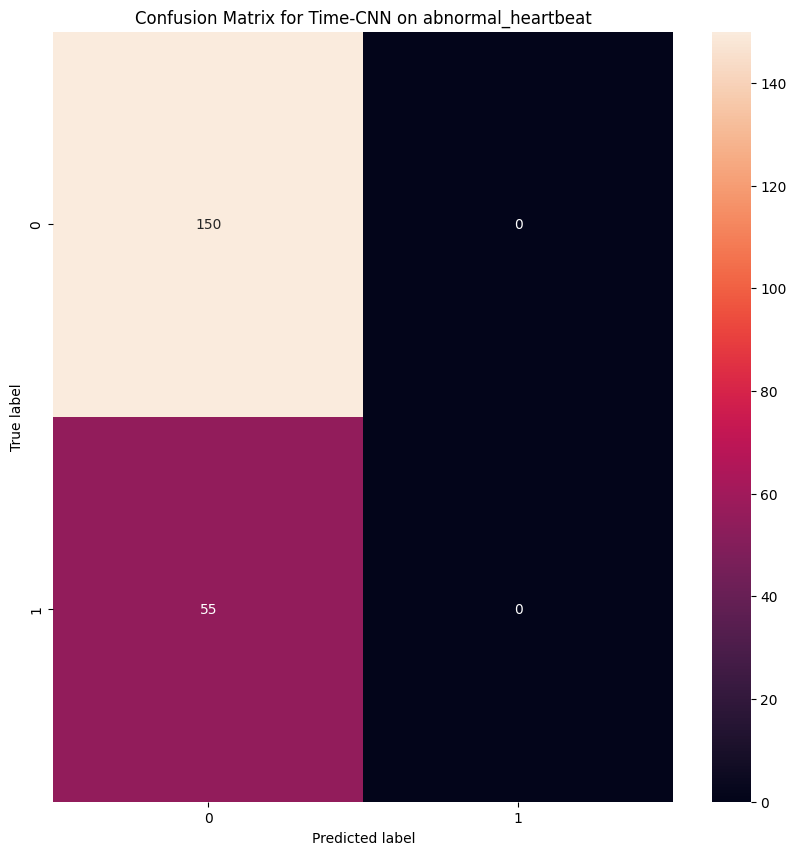

Dataset name:  arrow_head


Train on "arrow_head":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

6/6 [==============================] - 0s 0s/step


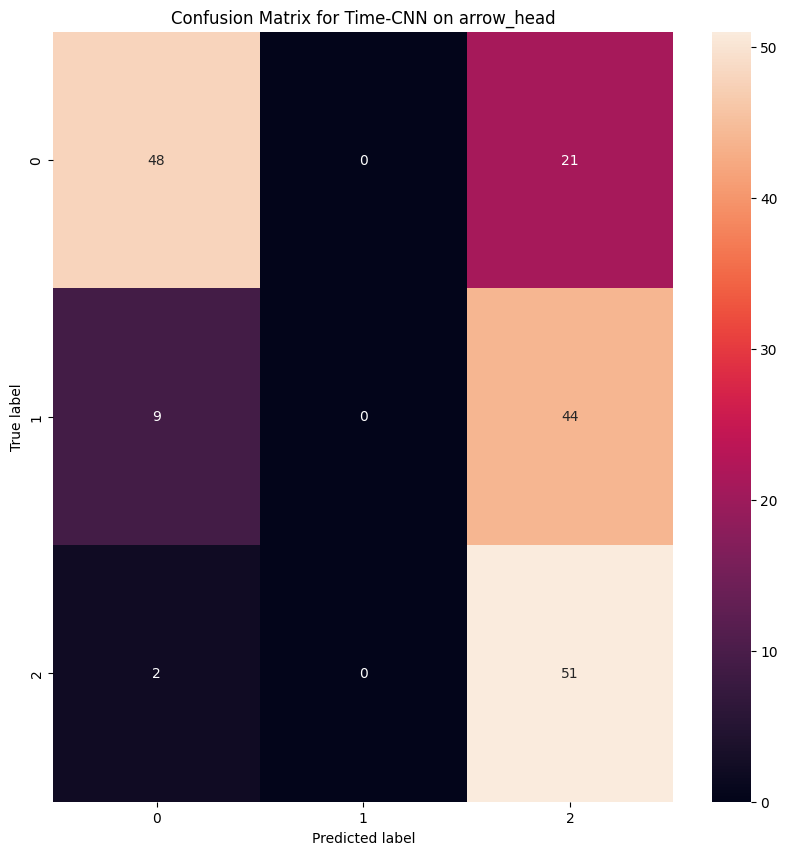

Dataset name:  bme


Train on "bme":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

5/5 [==============================] - 0s 0s/step


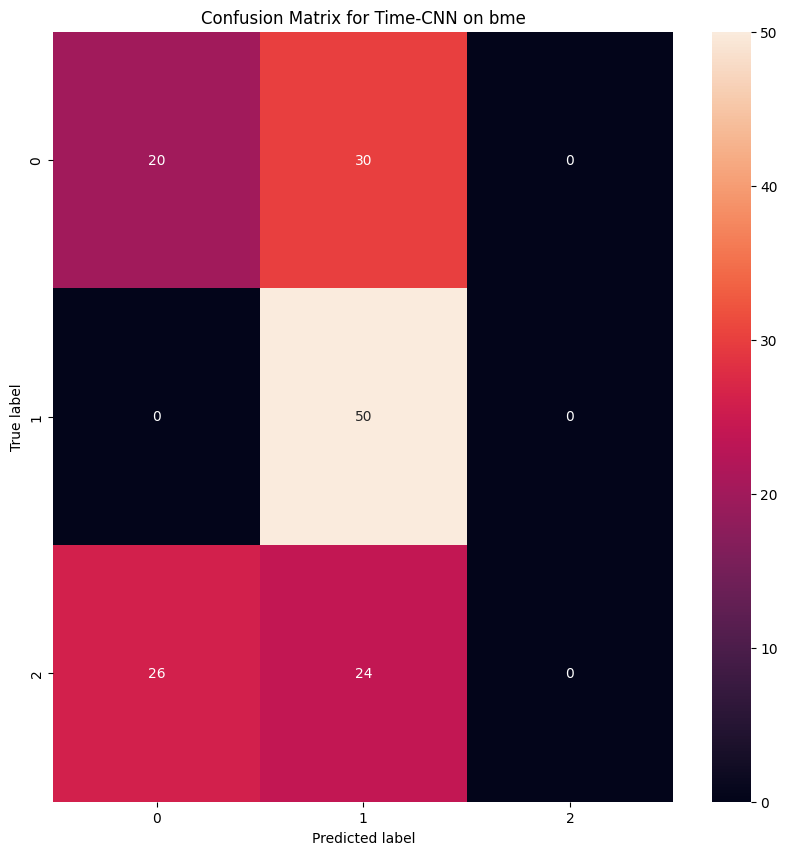

Dataset name:  car


Train on "car":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 5ms/step


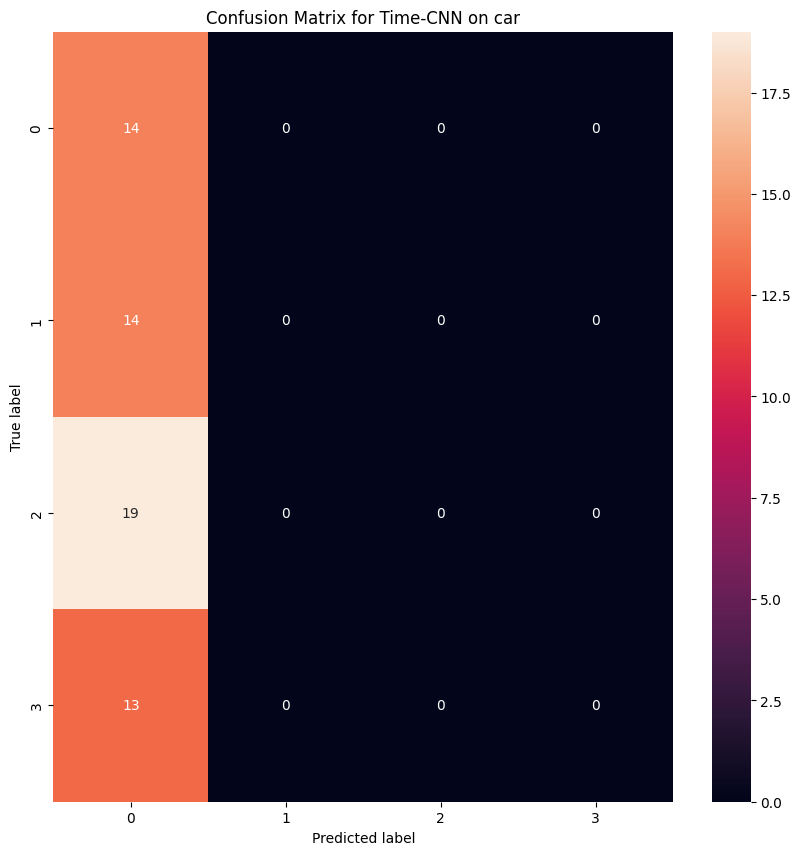

Dataset name:  cbf


Train on "cbf":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

29/29 [==============================] - 0s 3ms/step


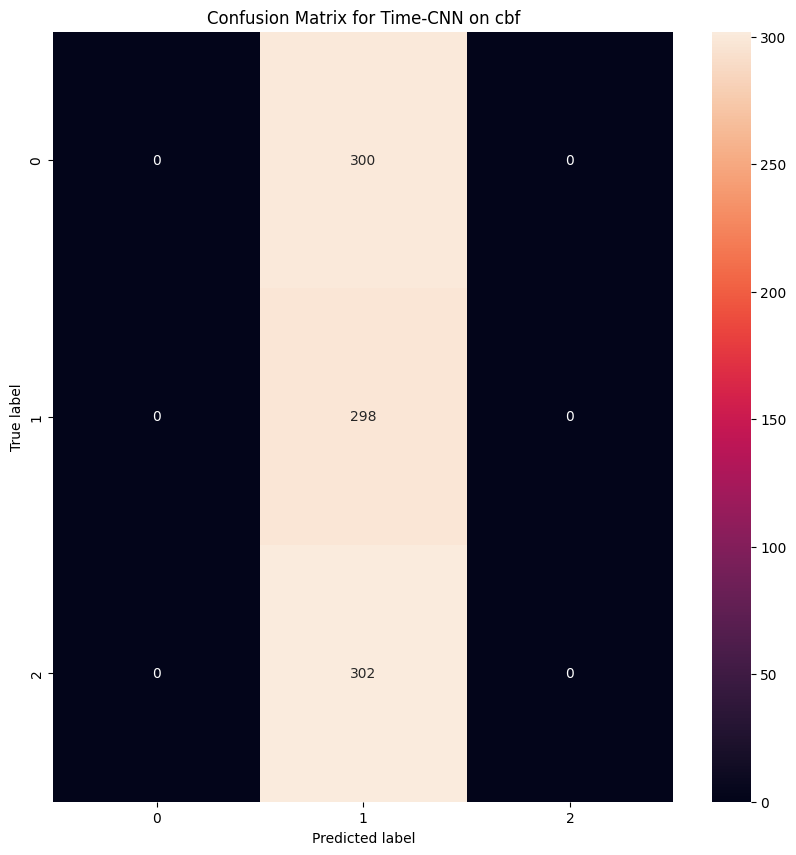

Dataset name:  chlorine_concentration


Train on "chlorine_concentration":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

120/120 [==============================] - 0s 3ms/step


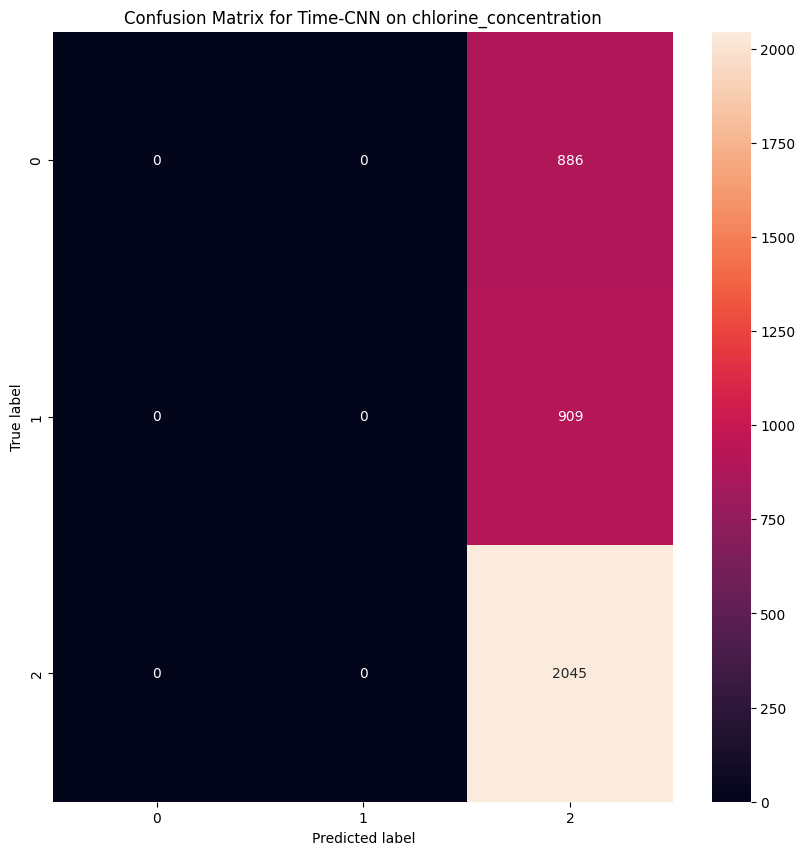

Dataset name:  coffee_beans


Train on "coffee_beans":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

1/1 [==============================] - 0s 76ms/step


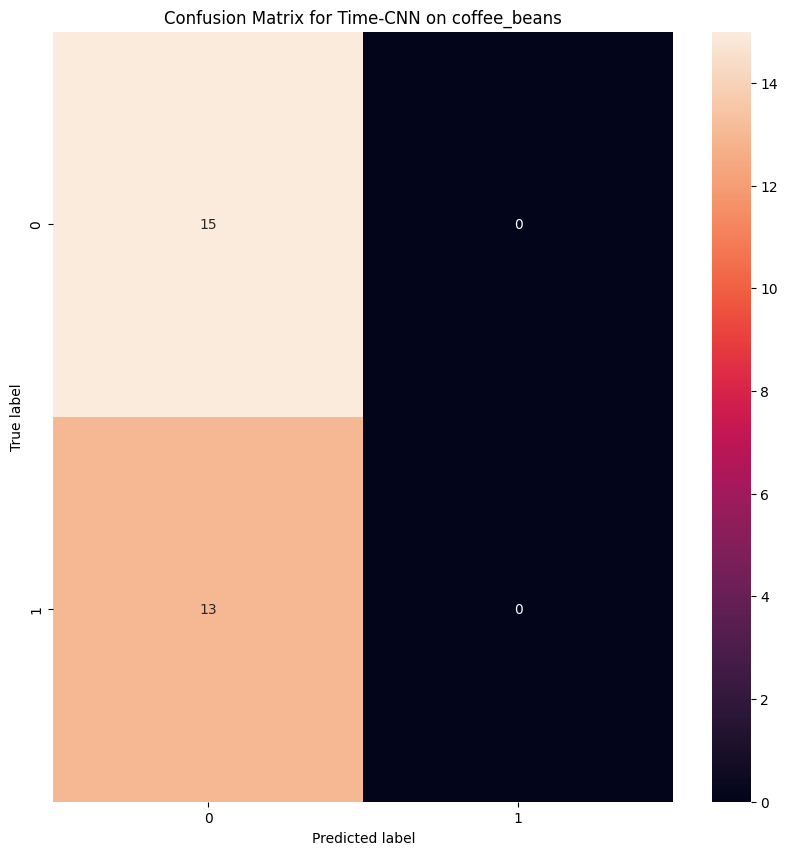

Dataset name:  colposcopy


Train on "colposcopy":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

4/4 [==============================] - 0s 0s/step


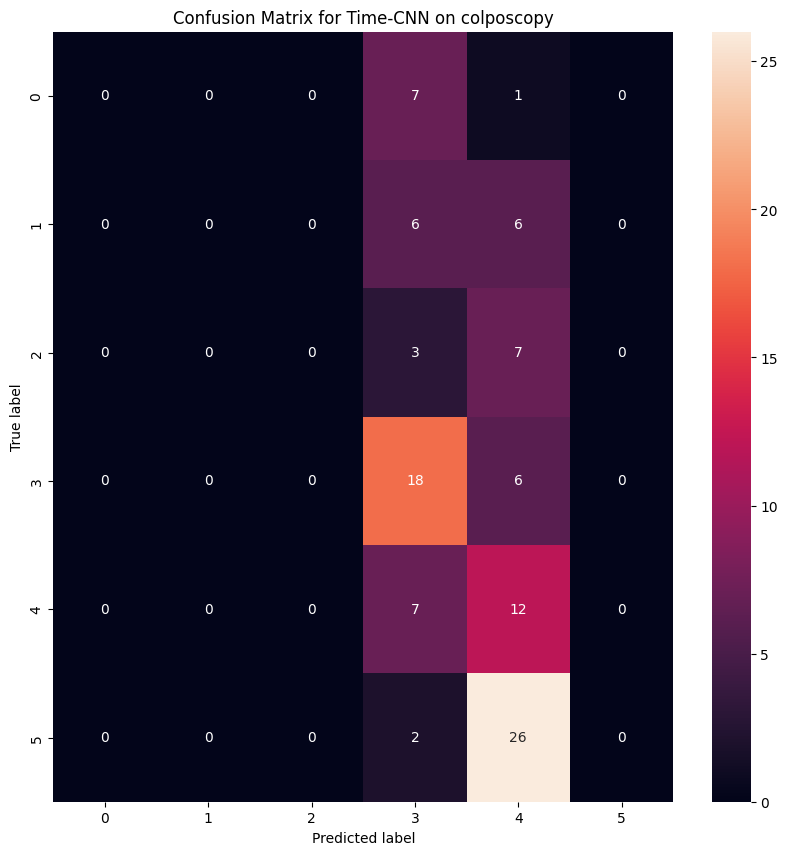

Dataset name:  cricket_y


Train on "cricket_y":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

13/13 [==============================] - 0s 4ms/step


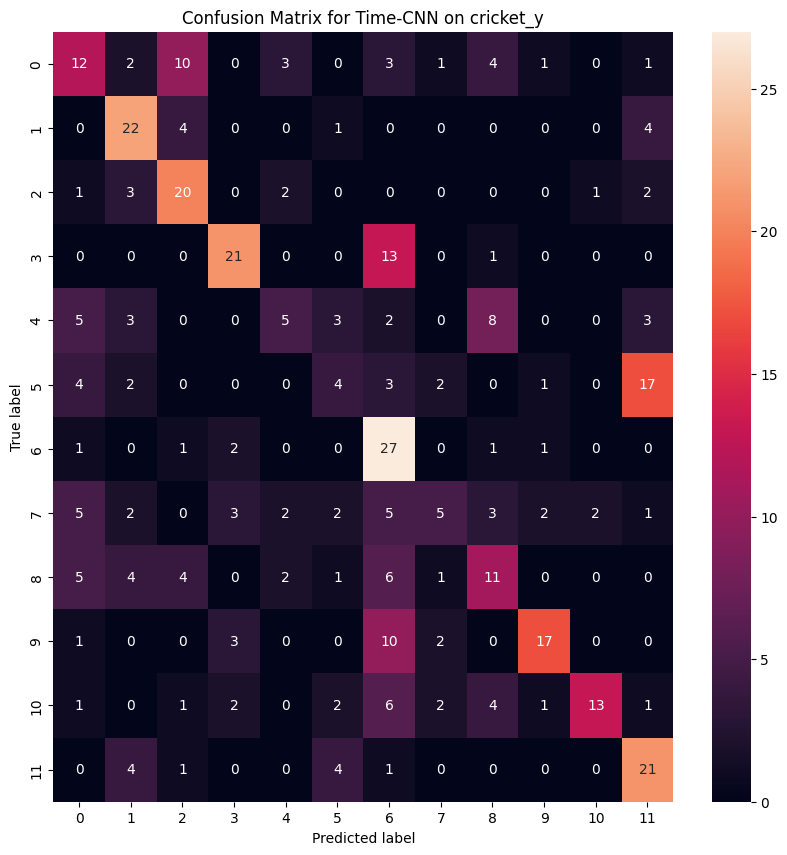

Dataset name:  distal_phalanax_tw


Train on "distal_phalanax_tw":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

5/5 [==============================] - 0s 3ms/step


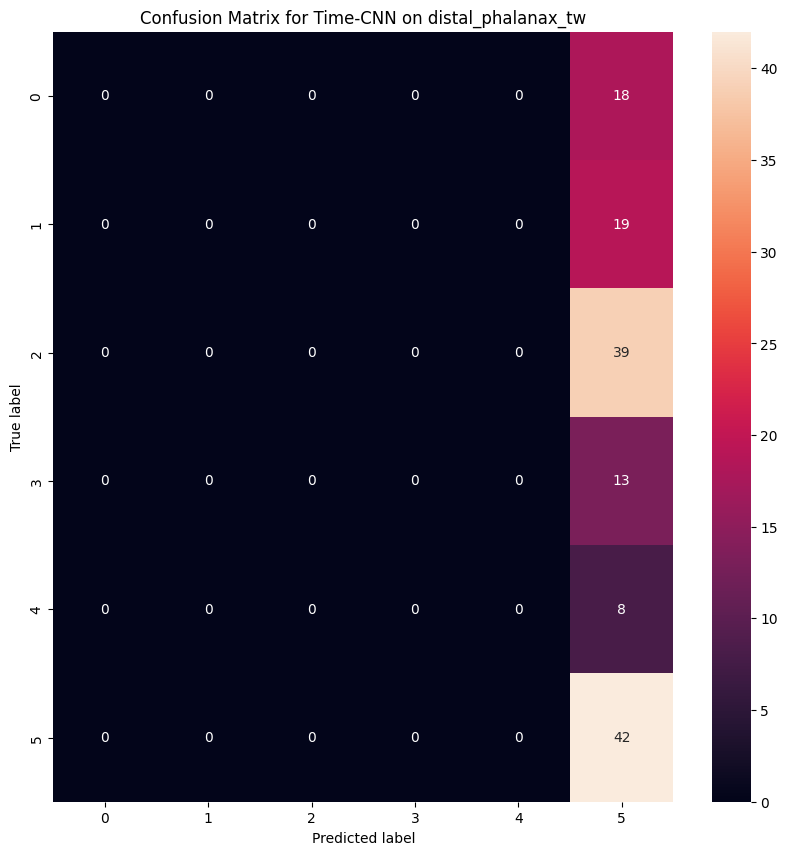

Dataset name:  distal_phalanx_outline


Train on "distal_phalanx_outline":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

9/9 [==============================] - 0s 2ms/step


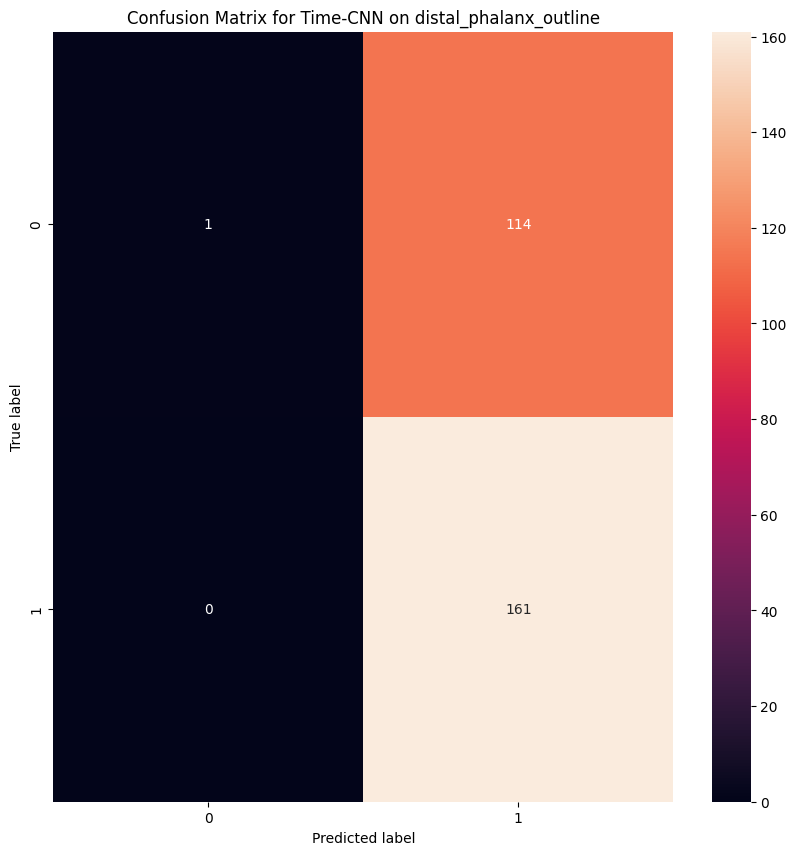

Dataset name:  dodger_loop_day


Train on "dodger_loop_day":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

3/3 [==============================] - 0s 0s/step


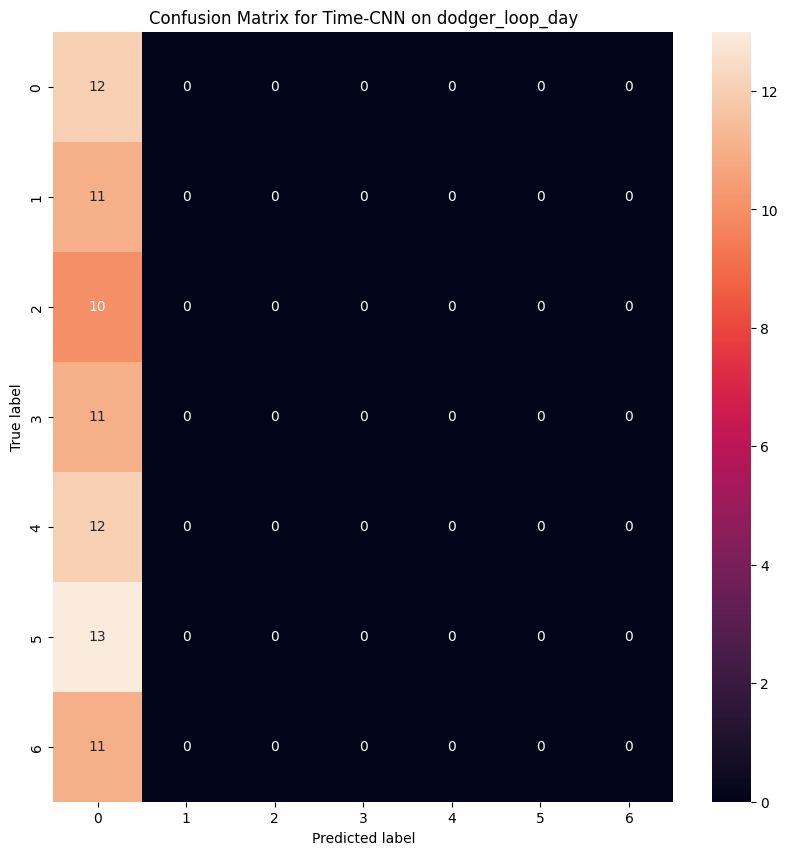

Dataset name:  earthquakes


Train on "earthquakes":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

5/5 [==============================] - 0s 4ms/step


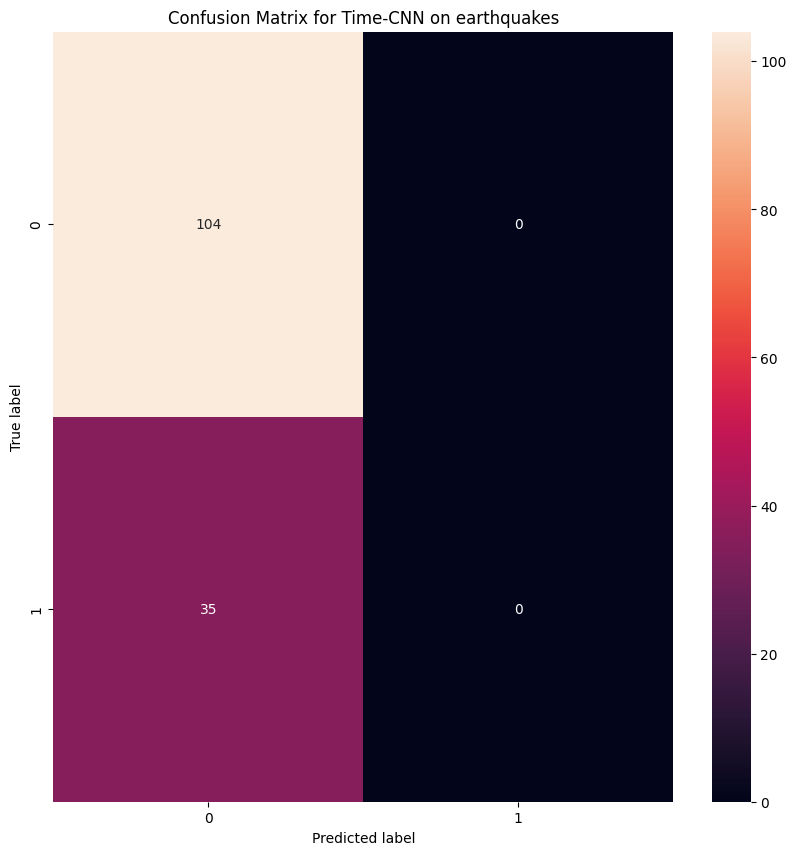

Dataset name:  electric_devices


Train on "electric_devices":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

241/241 [==============================] - 1s 3ms/step


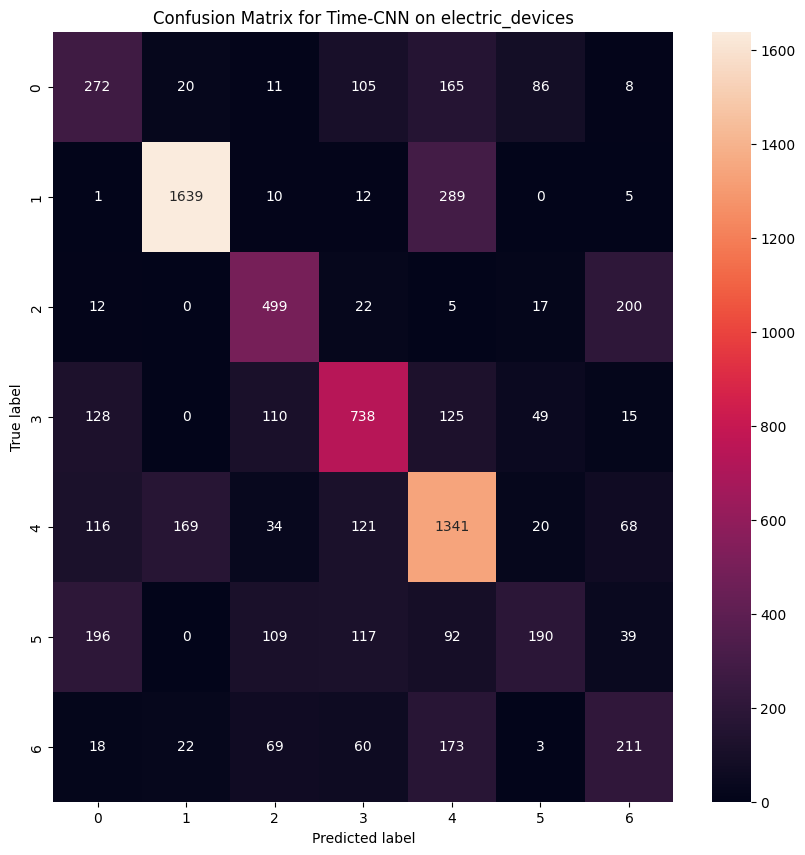

Dataset name:  face_ucr


Train on "face_ucr":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

65/65 [==============================] - 0s 3ms/step


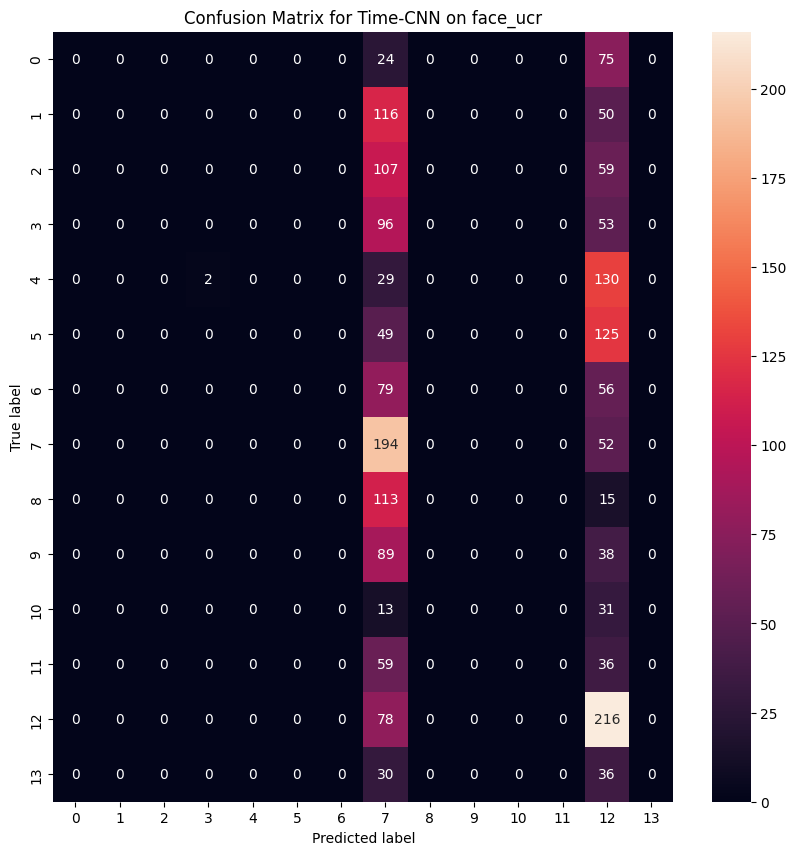

Dataset name:  fifty_words


Train on "fifty_words":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

15/15 [==============================] - 0s 3ms/step


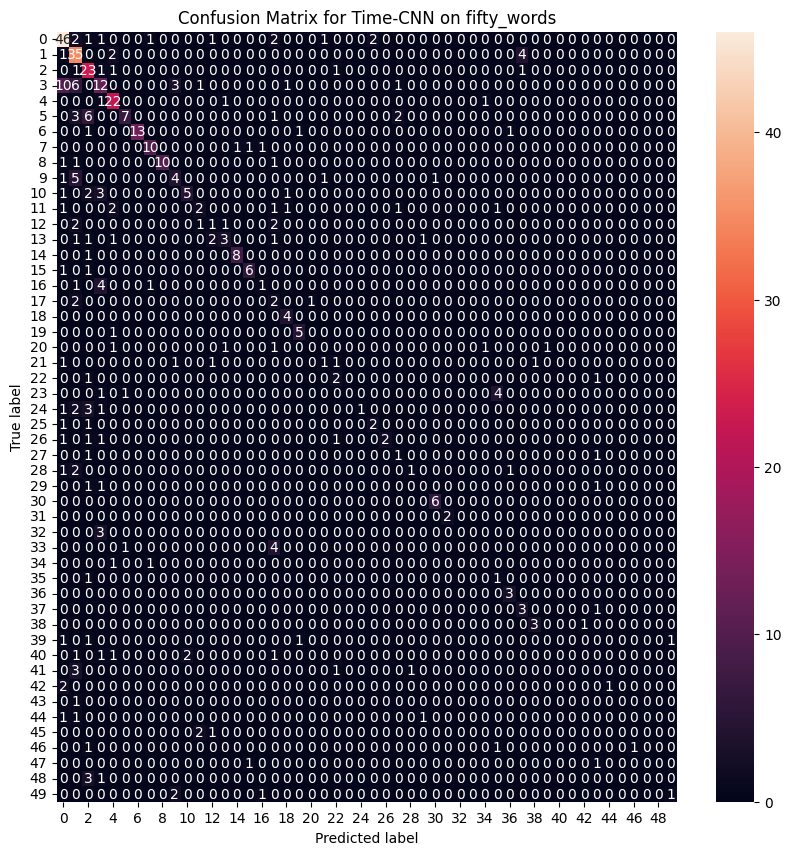

Dataset name:  fish


Train on "fish":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

6/6 [==============================] - 0s 4ms/step


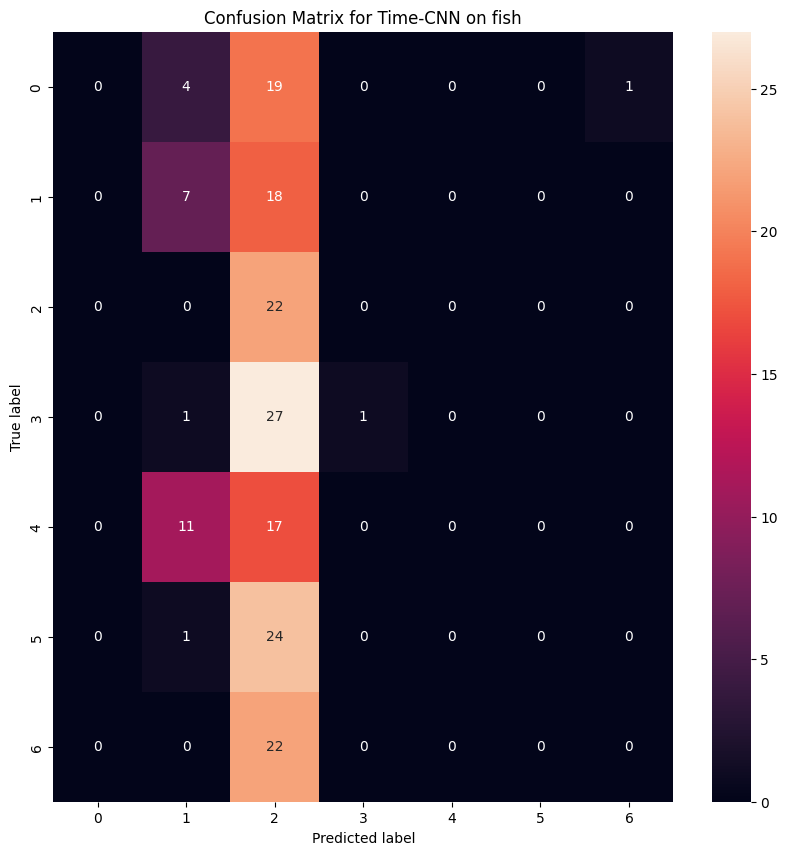

Dataset name:  freezers


Train on "freezers":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

90/90 [==============================] - 0s 3ms/step


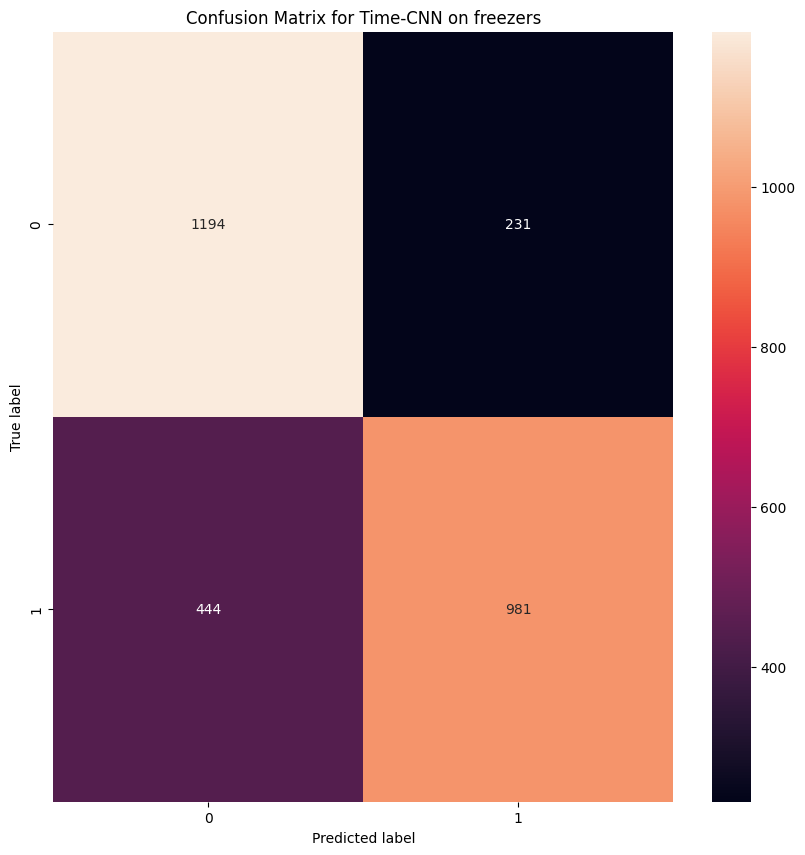

Dataset name:  gun_point_age_span


Train on "gun_point_age_span":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

10/10 [==============================] - 0s 3ms/step


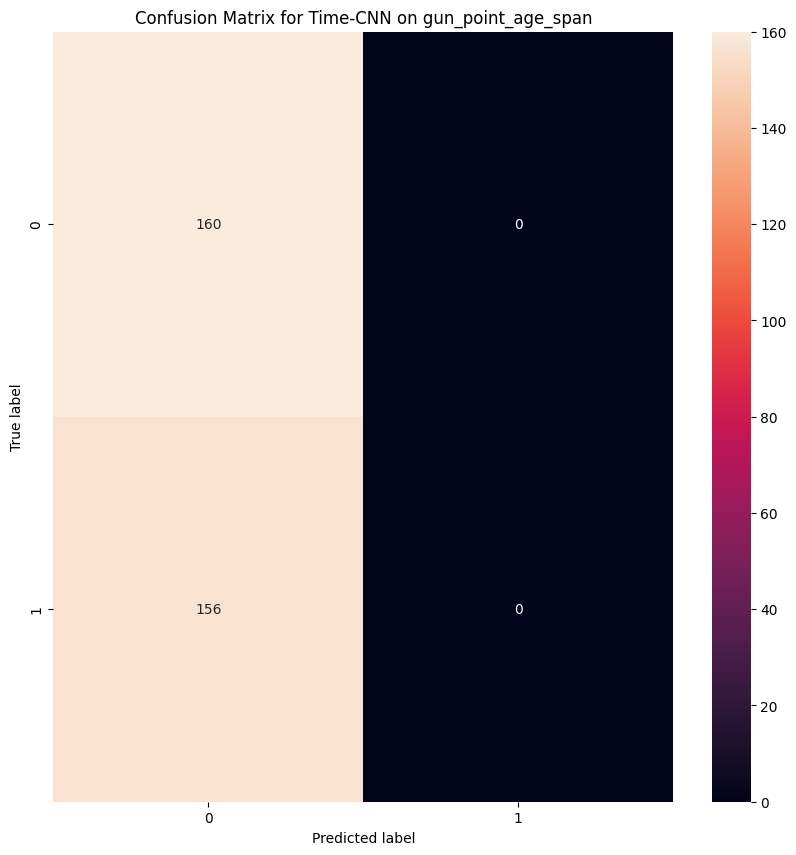

Dataset name:  gun_point_male_female


Train on "gun_point_male_female":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

10/10 [==============================] - 0s 3ms/step


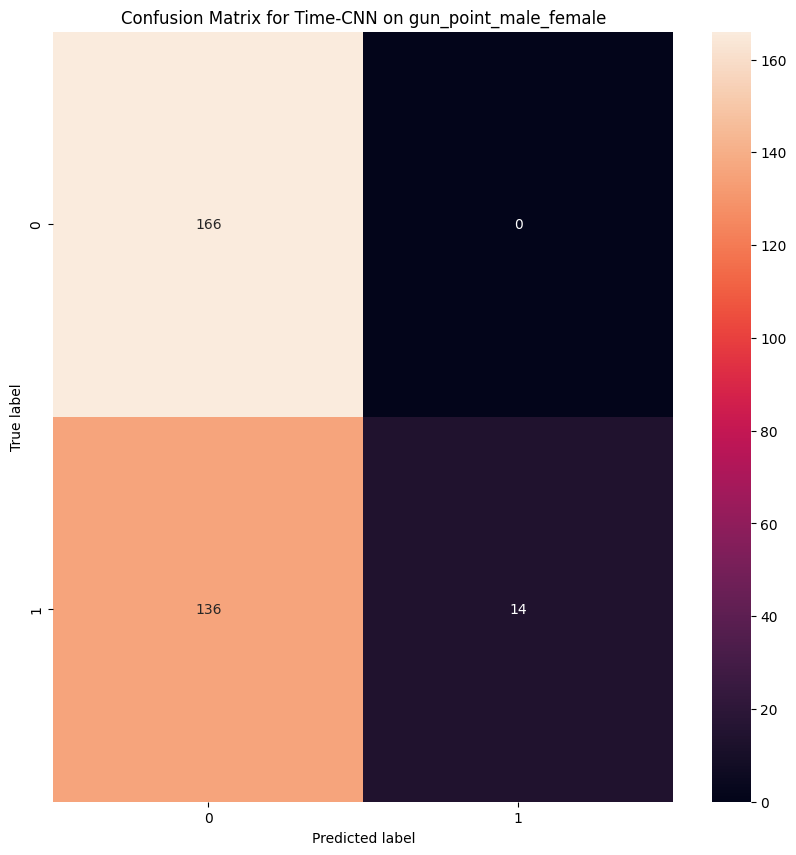

Dataset name:  gun_point_old_young


Train on "gun_point_old_young":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

10/10 [==============================] - 0s 3ms/step


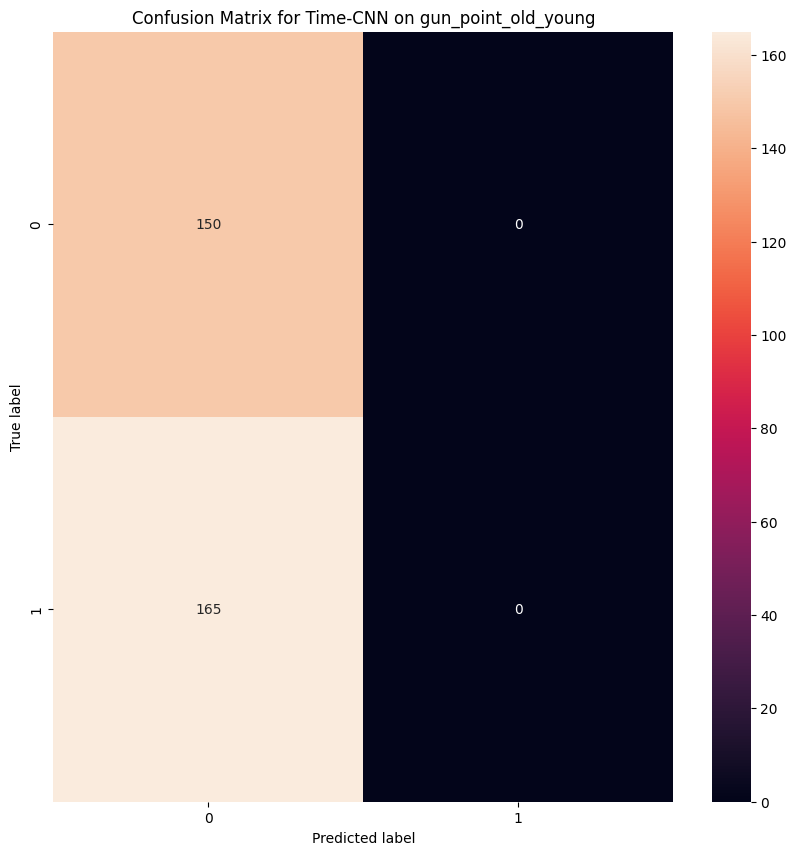

Dataset name:  lightning_7


Train on "lightning_7":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

3/3 [==============================] - 0s 3ms/step


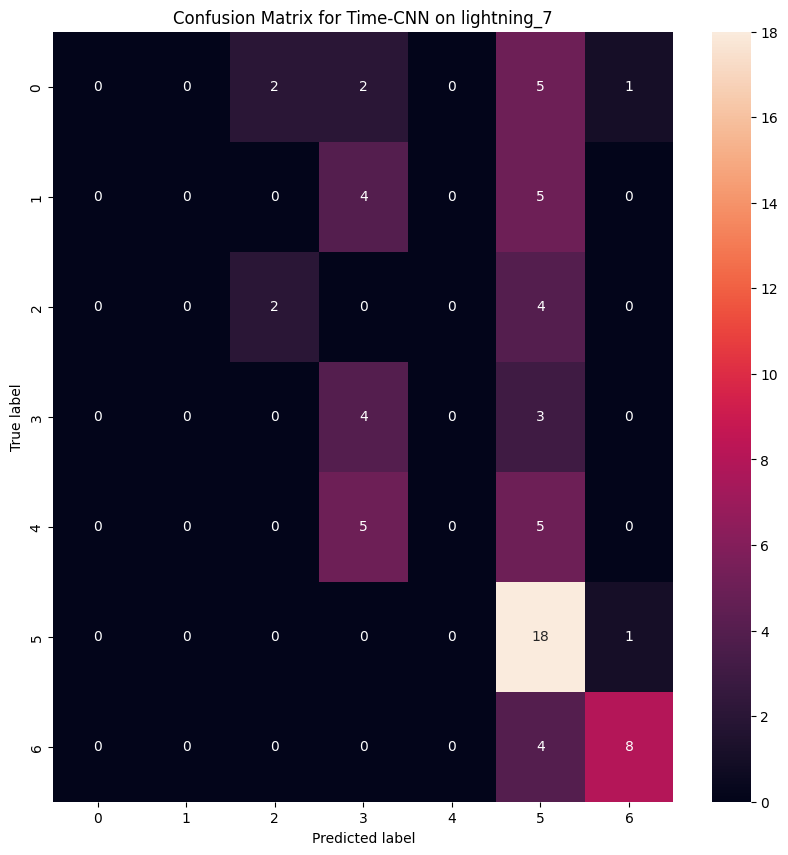

Dataset name:  medical_images


Train on "medical_images":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

24/24 [==============================] - 0s 3ms/step


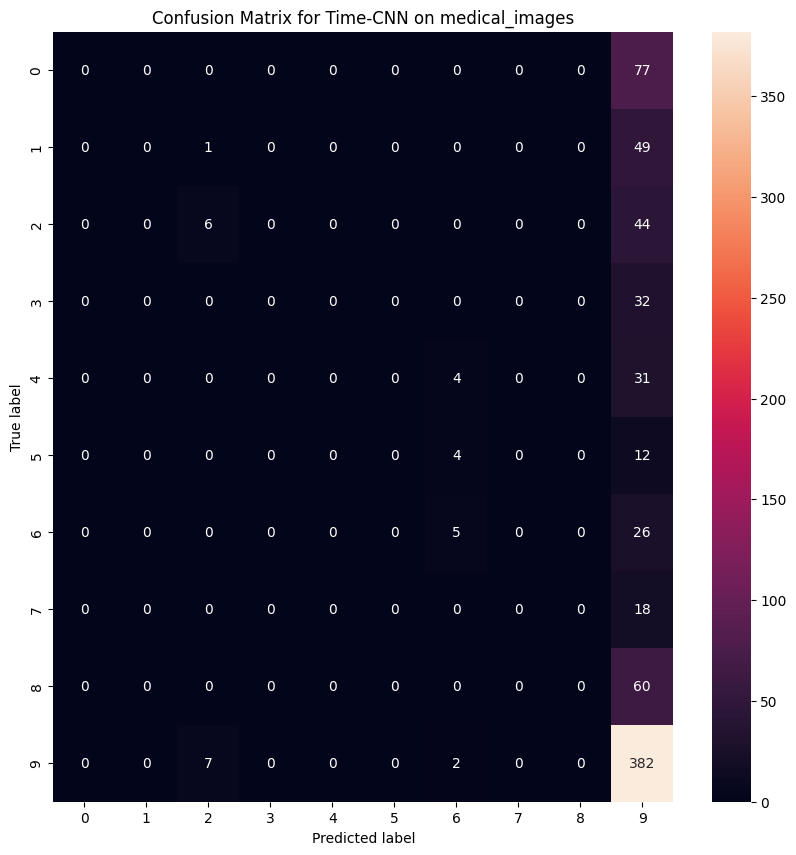

Dataset name:  middle_phalanx_age_group


Train on "middle_phalanx_age_group":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

5/5 [==============================] - 0s 3ms/step


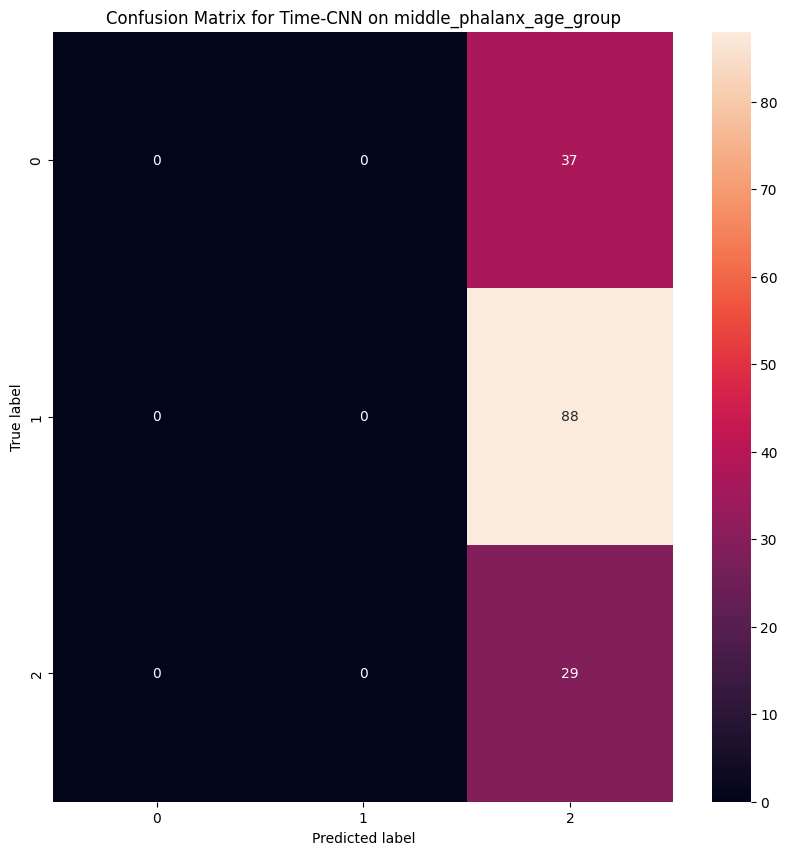

Dataset name:  middle_phalanx_correct


Train on "middle_phalanx_correct":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

10/10 [==============================] - 0s 2ms/step


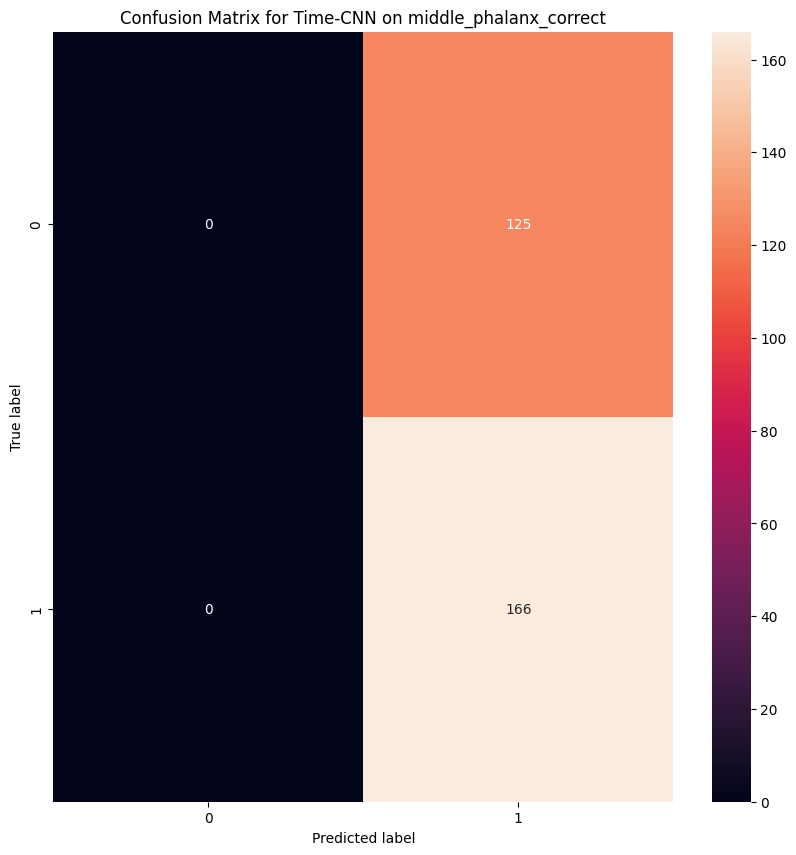

Dataset name:  phalanges_outlines_correct


Train on "phalanges_outlines_correct":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

27/27 [==============================] - 0s 2ms/step


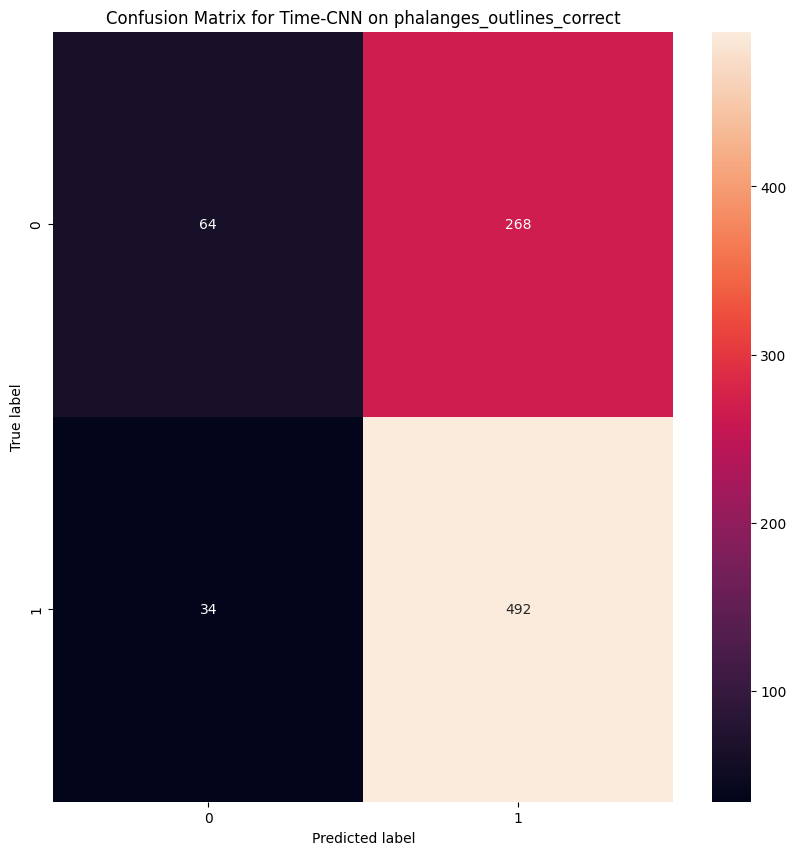

Dataset name:  plane


Train on "plane":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

4/4 [==============================] - 0s 3ms/step


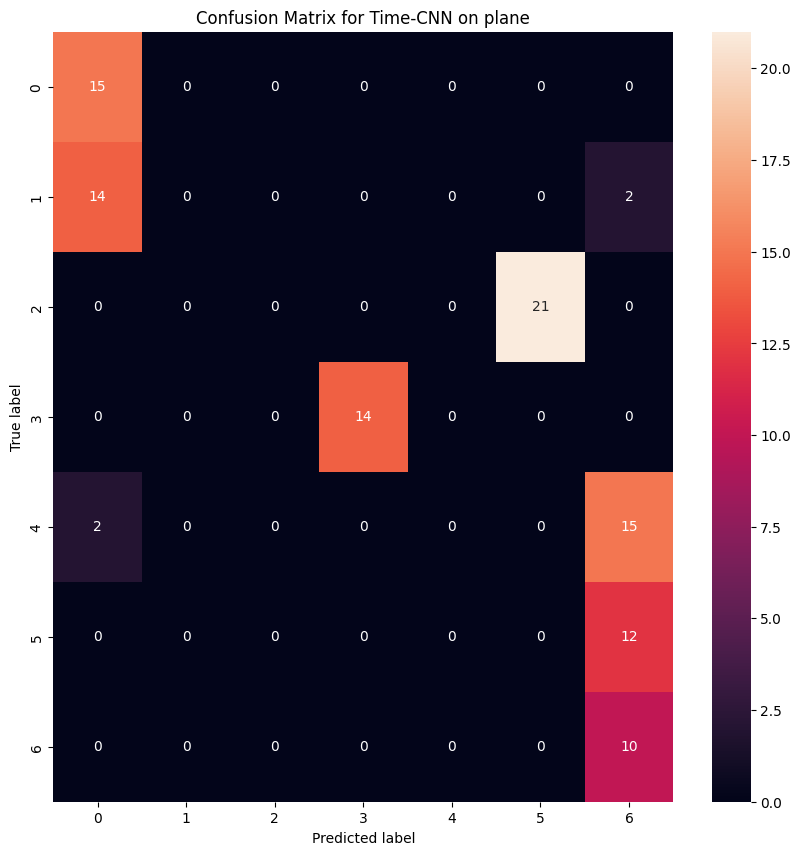

Dataset name:  power_cons


Train on "power_cons":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

6/6 [==============================] - 0s 3ms/step


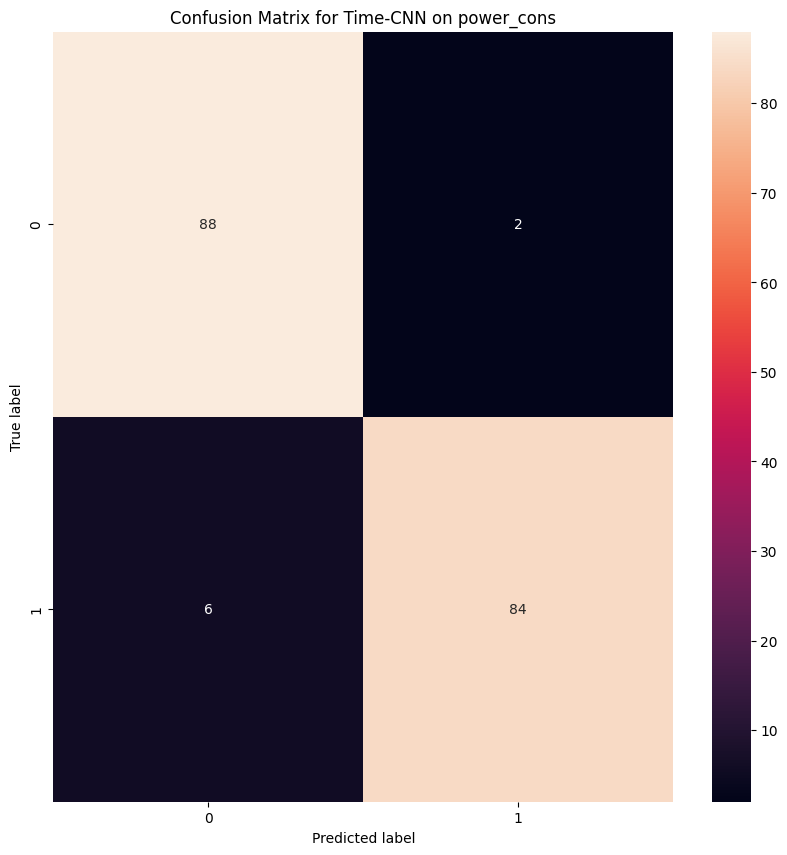

Dataset name:  share_price_increase


Train on "share_price_increase":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

31/31 [==============================] - 0s 2ms/step


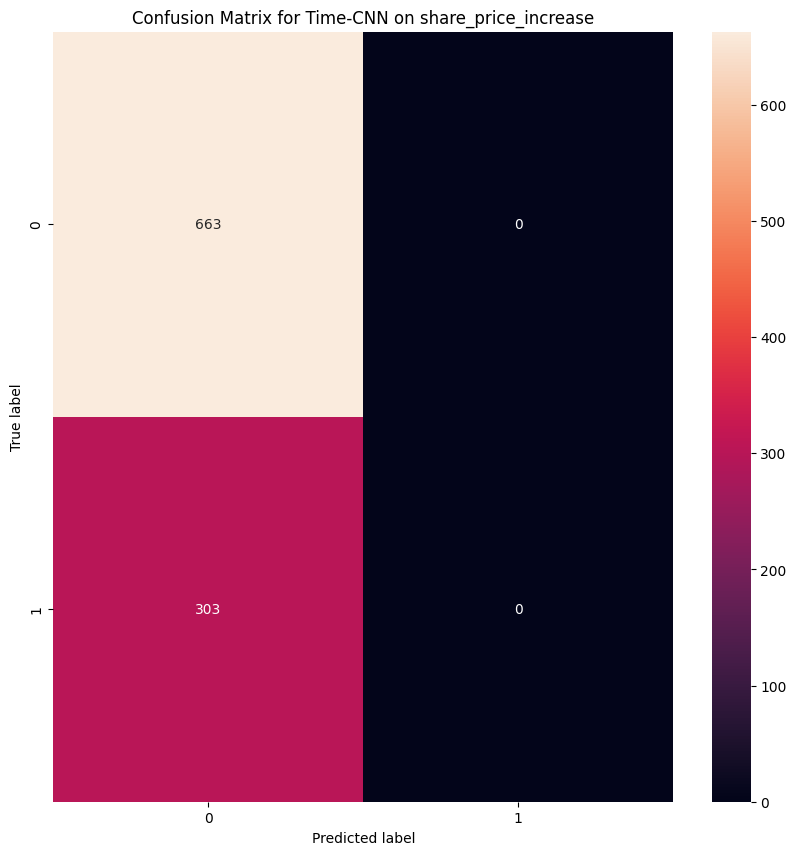

Dataset name:  strawberry


Train on "strawberry":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

12/12 [==============================] - 0s 4ms/step


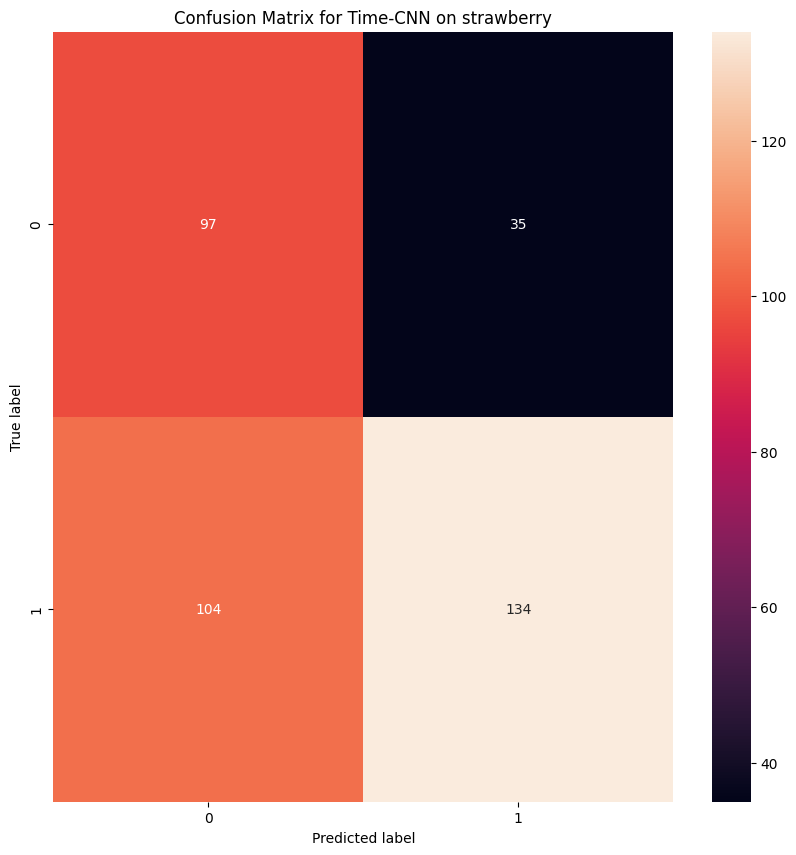

Dataset name:  swedish_leaf


Train on "swedish_leaf":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

20/20 [==============================] - 0s 2ms/step


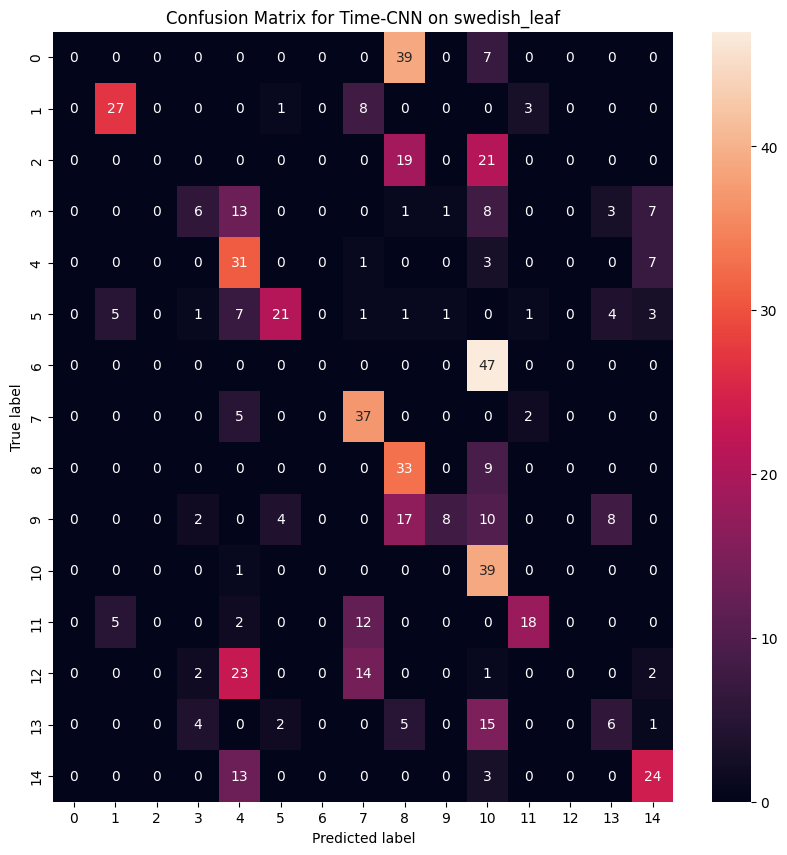

Dataset name:  synthetic_control


Train on "synthetic_control":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

10/10 [==============================] - 0s 2ms/step


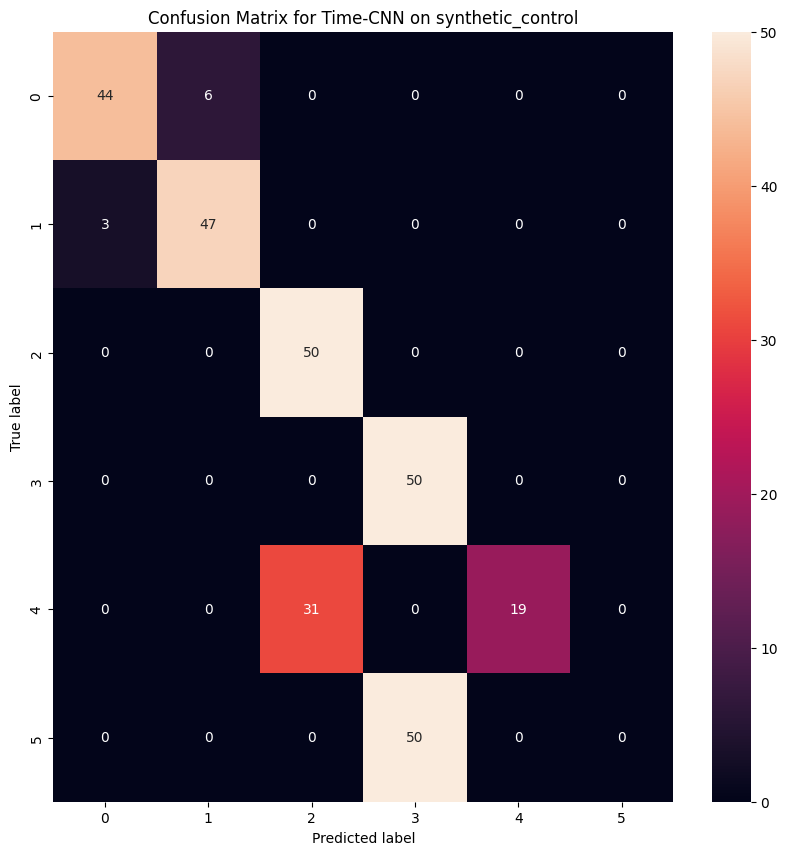

Dataset name:  trace


Train on "trace":   0%|          | 0/1 [00:00<?, ?model/s]

Model name:  Time-CNN


Time-CNN: 0epoch [00:00, ?epoch/s]

4/4 [==============================] - 0s 3ms/step


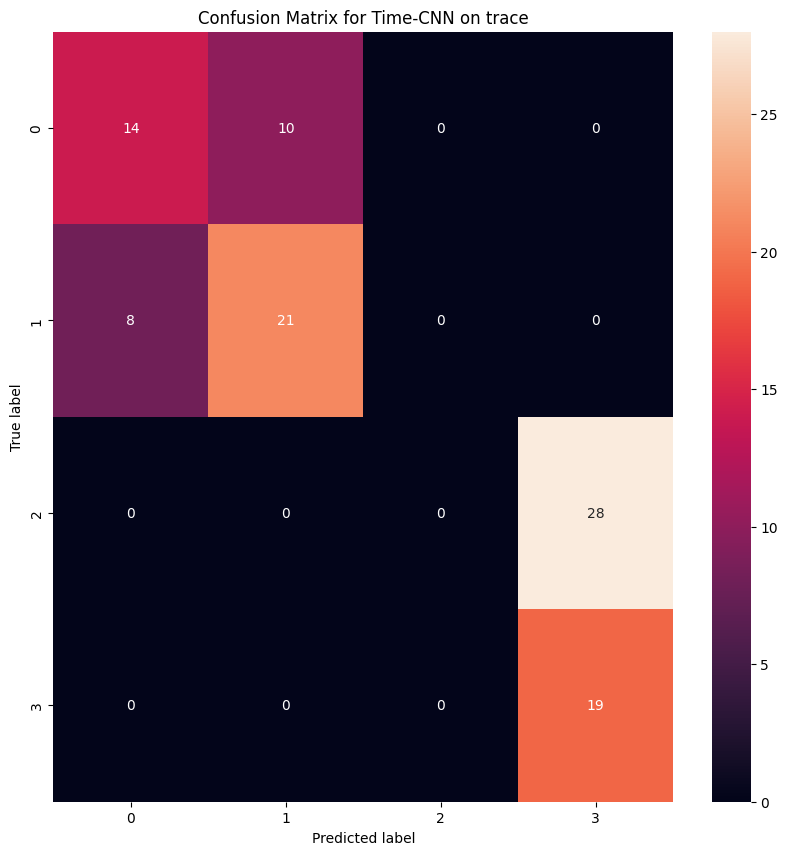

In [9]:
# with strategy.scope():
for ds_name, ds_data in tqdm(datasets_test_train_data.items(), unit='dataset'):
    print("Dataset name: ", ds_name)
    x_test, y_test = ds_data["test_data"]
    x_train, y_train = ds_data["train_data"]

    input_size = x_train.shape[1]
    output_size = len(np.unique(y_train))

    for get_model, model_name in tqdm(list(zip(models_getter, models_names)), unit='model', desc=f'Train on "{ds_name}"'):
        print("Model name: ", model_name)
        model = get_model(input_size, output_size)
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=[TqdmCallback(verbose=0, desc=model_name)], verbose=0)
        test_loss, test_acc = model.evaluate(x_test, y_test)

        confusion_matrix = get_confusion_matrix_for_model_and_data(model, x_test, y_test)
        visualize_confusion_matrix(confusion_matrix, model_name, ds_name)

        row = [ds_name,
              model_name,
              test_loss,
              test_acc,
              confusion_matrix,
              json.dumps(history.history)]
        append_to_csv(path_persist_results, row)

# Example load training results and display evaluation results

In [10]:
df_training_res = pd.read_csv(path_persist_results)

In [11]:
df_training_res

,dataset_name,model_name,test_loss,test_acc,confusion_matrix,history
0,abnormal_heartbeat,Time-CNN,0.599936,0.731707,NaN,"{""loss"": [2.7106239795684814, 1.90835368633270..."
1,arrow_head,Time-CNN,1.073200,0.405714,NaN,"{""loss"": [1.3207623958587646, 1.14341545104980..."
2,bme,Time-CNN,1.124677,0.466667,NaN,"{""loss"": [1.0574615001678467, 1.03728997707366..."
3,car,Time-CNN,1.368903,0.233333,NaN,"{""loss"": [1.5189228057861328, 1.37613451480865..."
4,cbf,Time-CNN,1.039441,0.511111,NaN,"{""loss"": [1.2076107263565063, 1.09962046146392..."
...,...,...,...,...,...,...
94,share_price_increase,Time-CNN,0.719258,0.686335,[[663 0]\r\n [303 0]],"{""loss"": [0.4190264642238617, 0.40842187404632..."
95,strawberry,Time-CNN,0.584483,0.624324,[[ 97 35]\r\n [104 134]],"{""loss"": [0.6601784229278564, 0.64484345912933..."
96,swedish_leaf,Time-CNN,1.907657,0.400000,[[ 0 0 0 0 0 0 0 0 39 0 7 0 0 0 0...,"{""loss"": [2.7897720336914062, 2.72478699684143..."
97,synthetic_control,Time-CNN,1.984361,0.700000,[[44 6 0 0 0 0]\r\n [ 3 47 0 0 0 0]\r...,"{""loss"": [1.7302008867263794, 1.63403534889221..."


In [12]:
history = df_training_res['history'][0]

Highest Validation Accuracy: 1.0


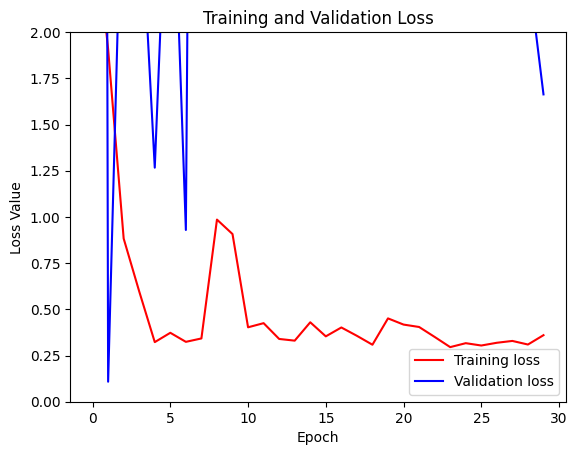

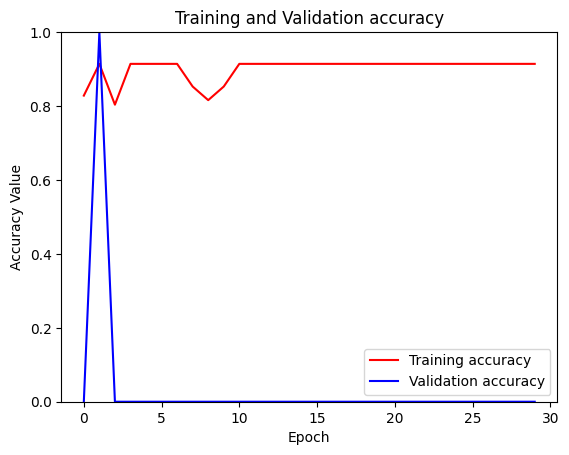

In [13]:
plot_model_history(json.loads(history), epochs=epochs)